# Data Preprocessing Tools

## Importing the libraries

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [9]:
# Load Excel files
df = pd.read_csv("1_maintenance_survival_data/1_maintenance_survival_data.csv")

In [10]:
print(df.columns)

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'team', 'provider'],
      dtype='object')


In [11]:
print(df.head())

   lifetime  broken  pressureInd  moistureInd  temperatureInd   team  \
0        56       0    92.178854   104.230204       96.517159  TeamA   
1        81       1    72.075938   103.065701       87.271062  TeamC   
2        60       0    96.272254    77.801376      112.196170  TeamA   
3        86       1    94.406461   108.493608       72.025374  TeamC   
4        34       0    97.752899    99.413492      103.756271  TeamB   

    provider  
0  Provider4  
1  Provider4  
2  Provider1  
3  Provider2  
4  Provider1  


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   broken          1000 non-null   int64  
 2   pressureInd     1000 non-null   float64
 3   moistureInd     1000 non-null   float64
 4   temperatureInd  1000 non-null   float64
 5   team            1000 non-null   object 
 6   provider        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB
None


## One hot encoding

In [ ]:
time_column = 'lifetime'
event_column = 'broken'

df_encoded = pd.get_dummies(df, columns = ['provider', 'team'], drop_first=True).astype(int)

In [16]:
print(df_encoded.head())

   lifetime  broken  pressureInd  moistureInd  temperatureInd  \
0        56       0           92          104              96   
1        81       1           72          103              87   
2        60       0           96           77             112   
3        86       1           94          108              72   
4        34       0           97           99             103   

   provider_Provider2  provider_Provider3  provider_Provider4  team_TeamB  \
0                   0                   0                   1           0   
1                   0                   0                   1           0   
2                   0                   0                   0           0   
3                   1                   0                   0           0   
4                   0                   0                   0           1   

   team_TeamC  
0           0  
1           1  
2           0  
3           1  
4           0  


In [17]:
print(df_encoded.columns)

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'provider_Provider2', 'provider_Provider3', 'provider_Provider4',
       'team_TeamB', 'team_TeamC'],
      dtype='object')


In [19]:
features = np.setdiff1d(df_encoded.columns, ['lifetime', 'broken']).tolist()
print(features)
print(len(features))

['moistureInd', 'pressureInd', 'provider_Provider2', 'provider_Provider3', 'provider_Provider4', 'team_TeamB', 'team_TeamC', 'temperatureInd']
8


## Check for Null / Duplicates

In [20]:
# Checking for null values
N_null = sum(df_encoded[features].isnull().sum())
print("The raw_dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(df_encoded.duplicated(keep='first'))
print("The raw_dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
dataset = df_encoded.drop_duplicates(keep='first').reset_index(drop=True)
N = dataset.shape[0]
print(N)

The raw_dataset contains 0 null values
The raw_dataset contains 0 duplicates
1000


## Outlier Analysis

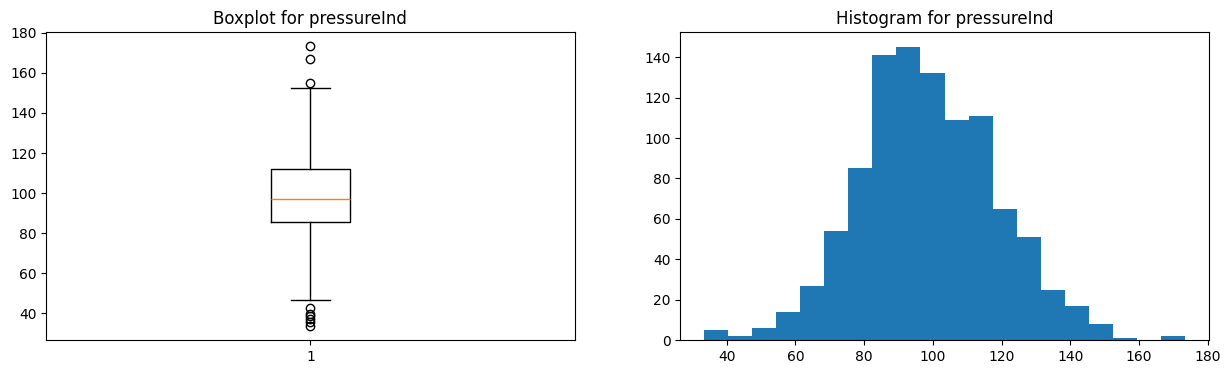

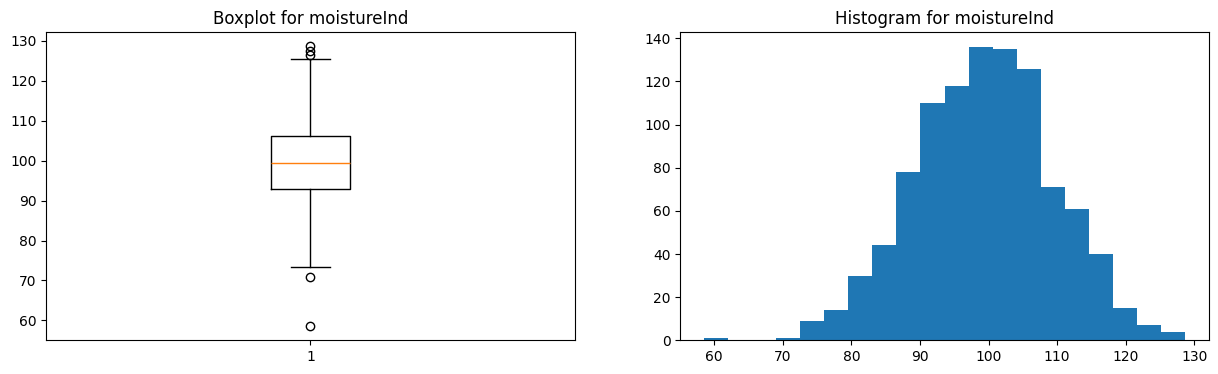

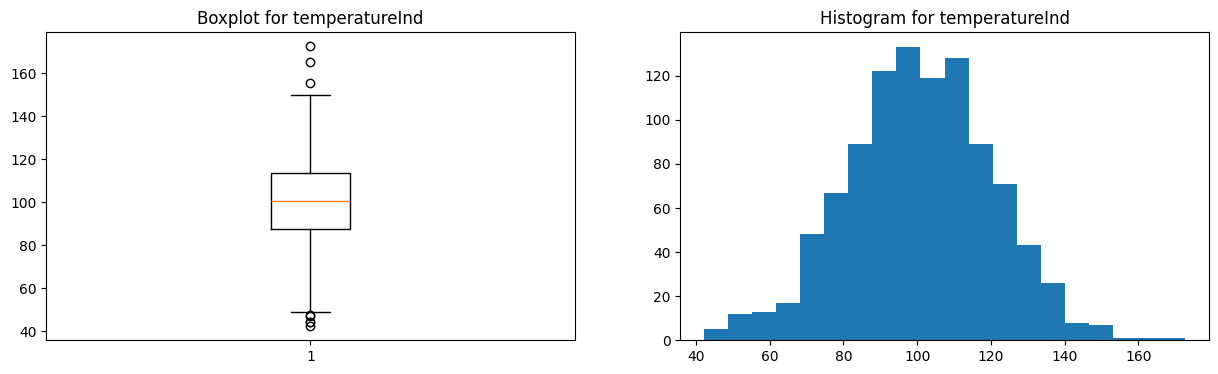

In [21]:
from matplotlib import pyplot as plt
for feature in ['pressureInd','moistureInd','temperatureInd']:

    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = df[feature].values

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(feature) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(feature) )

    # Display
    plt.show()

## Occurences of categorical Features

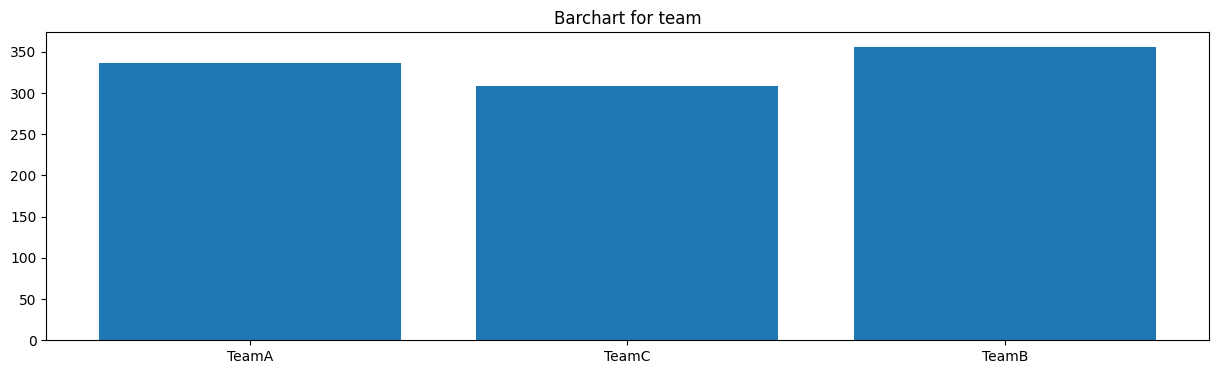

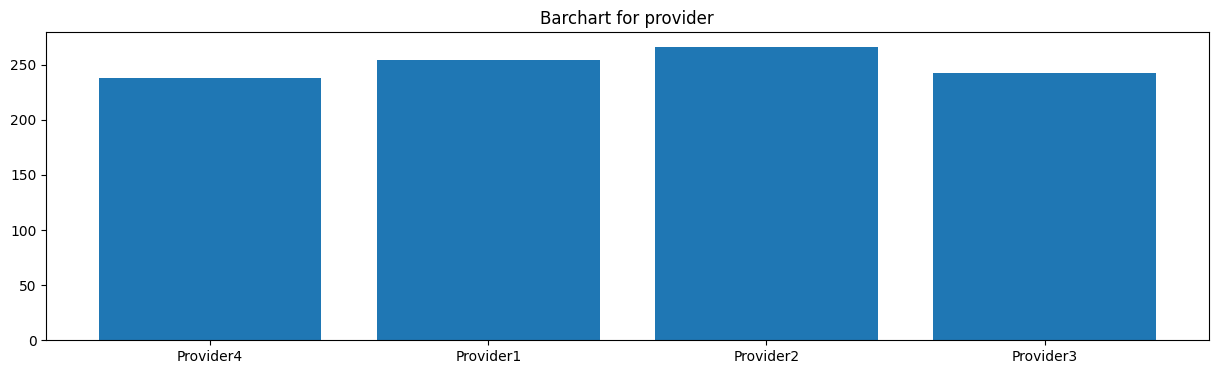

In [22]:
from collections import Counter
for feature in ['team', 'provider']:

    # Creating an empty chart
    fig, ax = plt.subplots(figsize=(15, 4))

    # Extracting the feature values
    x = df[feature].values

    # Counting the number of occurrences for each category
    data = Counter(x)
    category = list(data.keys())
    counts = list(data.values())

    # Boxplot
    ax.bar(category, counts)

    # Display
    plt.title( 'Barchart for {}'.format(feature) )
    plt.show()

## Time & Event Occurence

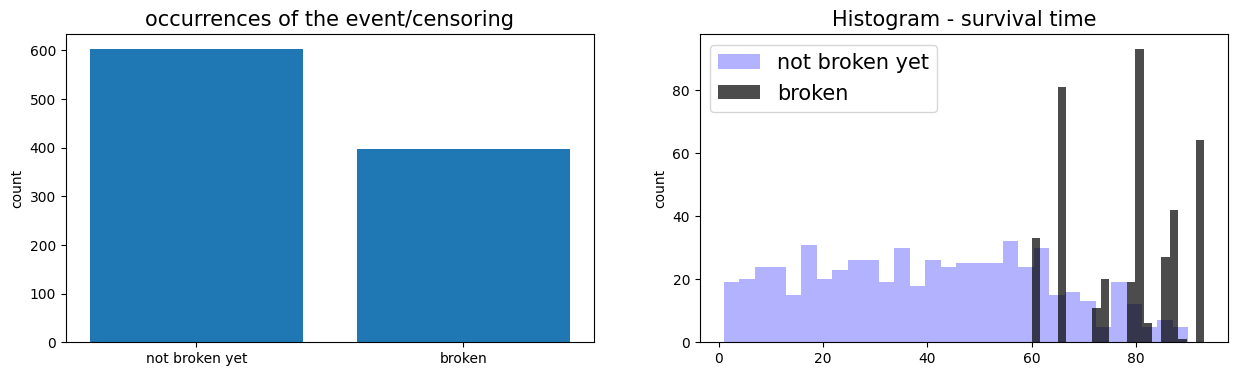

In [25]:
# Creating an empty chart
fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

# Counting the number of occurrences for each category 
data = Counter(df['broken'].replace({0:'not broken yet', 1:'broken'}))
category = list(data.keys())
counts = list(data.values())
idx = range(len(counts))

# Displaying the occurrences of the event/censoring
ax1.bar(idx, counts)
ax1.set_xticks(idx)
ax1.set_xticklabels(category)
ax1.set_title( 'occurrences of the event/censoring', fontsize=15)
ax1.set_ylabel("count")

# Showing the histogram of the survival times for the censoring
time_0 = df.loc[ df['broken'] == 0, 'lifetime']
ax2.hist(time_0, bins=30, alpha=0.3, color='blue', label = 'not broken yet')

# Showing the histogram of the survival times for the events
time_1 = df.loc[ df['broken'] == 1, 'lifetime']
ax2.hist(time_1, bins=20, alpha=0.7, color='black', label = 'broken')
ax2.set_title( 'Histogram - survival time', fontsize=15)
ax2.set_ylabel("count")

# Displaying everything side-by-side
plt.legend(fontsize=15)
plt.show()

Here, we can see that 2/3 of the data is censored (means 0) and that the failures start happening when the machine has been active for at least 60 weeks.

## Correlation

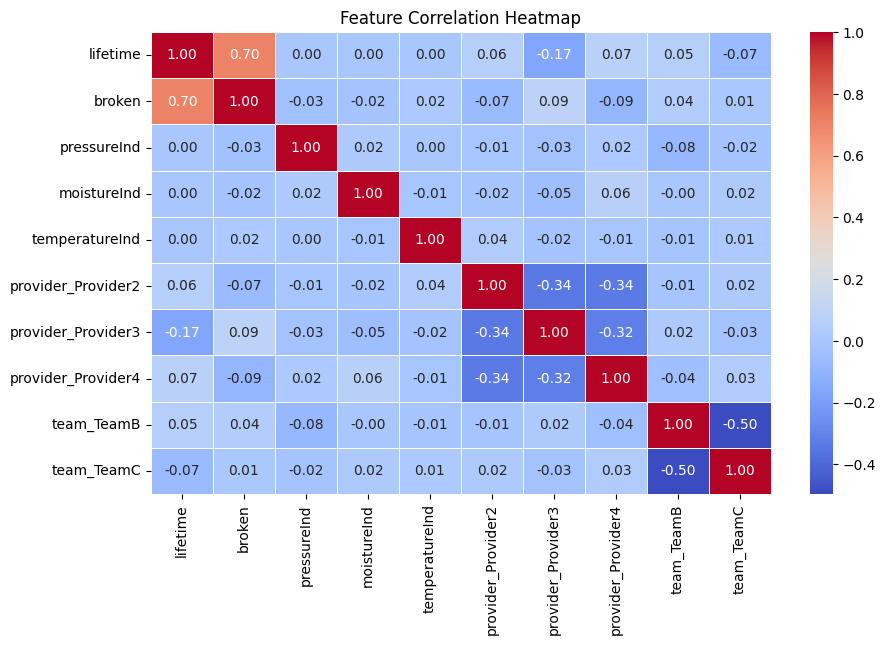

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Export Updated Excel

In [29]:
# Create the folder if it doesn't exist
os.makedirs("2_maintenance_updated_data", exist_ok=True)

# Save the Excel file inside the folder
df_encoded.to_csv("2_maintenance_updated_data/2_maintenance_updated_data.csv", index=False)